In [2]:
import numpy as np
import os
import torchvision.transforms as T
from torchvision.io import read_image
from torchvision.io.image import ImageReadMode
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [30]:
path_lr = "./testdata/Plotting_v2_fixeddata/Image_test_lowers"
path_gen = "./testdata/Plotting_v2_fixeddata/Image_test_generated"
path_gen8 = "./testdata/Plotting_v2_fixeddata/Image_test_generated_resratio8"
path_gen16 = "./testdata/Plotting_v2_fixeddata/Image_test_generated_resratio16"
path_hr = "./testdata/Plotting_v2_fixeddata/Image_test_truth"

n_example_imgs = 25
files = sorted(os.listdir(path_lr))
files_hr = sorted(os.listdir(path_hr))
files_gen = sorted(os.listdir(path_gen))
files_gen8 = sorted(os.listdir(path_gen8))
files_gen16 = sorted(os.listdir(path_gen16))

first_file = files[0]
path =  os.path.join(path_lr, first_file)
images_lr = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

first_file = files_hr[0]
path =  os.path.join(path_hr, first_file)
images_hr = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

first_file = files_gen[0]
path =  os.path.join(path_gen, first_file)
images_gen = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

first_file = files_gen8[0]
path =  os.path.join(path_gen8, first_file)
images_gen8 = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

first_file = files_gen16[0]
path =  os.path.join(path_gen16, first_file)
images_gen16 = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)

for i in range(n_example_imgs):
    file = files[i + 1]
    print(file)
    path =  os.path.join(path_lr, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_lr = torch.cat([images_lr, img], dim=0)
    
    file = files_hr[i + 1]
    print(file)
    path =  os.path.join(path_hr, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_hr = torch.cat([images_hr, img], dim=0)
    
    file = files_gen[i + 1]
    print(file)
    path =  os.path.join(path_gen, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_gen = torch.cat([images_gen, img], dim=0)
    
    file = files_gen8[i + 1]
    print(file)
    path =  os.path.join(path_gen8, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_gen8 = torch.cat([images_gen8, img], dim=0)
    
    file = files_gen16[i + 1]
    print(file)
    path =  os.path.join(path_gen16, file)
    img = read_image(path, mode = ImageReadMode(3)).unsqueeze(0)
    images_gen16 = torch.cat([images_gen16, img], dim=0)

images_lr8 = images_lr[:, :, ::2, ::2]
images_lr16 = images_lr[:, :, ::4, ::4]
    
norm = 255 / 2.0
transform_lr = T.Normalize((norm, norm, norm), (norm, norm, norm))
images_lr_save = images_lr
images_lr = transform_lr(images_lr.float())

images_lr_save8 = images_lr8
images_lr8 = transform_lr(images_lr8.float())

images_lr_save16 = images_lr16
images_lr16 = transform_lr(images_lr16.float())

transform_hr = T.Normalize((norm, norm, norm), (norm, norm, norm))

images_hr_save = images_hr
images_hr = transform_hr(images_hr.float())

images_gen_save = images_gen
images_gen = transform_hr(images_gen.float())

images_gen_save8 = images_gen8
images_gen8 = transform_hr(images_gen8.float())

images_gen_save16 = images_gen16
images_gen16 = transform_hr(images_gen16.float())

images_bicubic = F.interpolate(images_lr.float(), size = [images_hr.shape[-1], images_hr.shape[-2]], mode = "bicubic")
images_bicubic = images_bicubic.clamp(-1, 1)
images_bicubic_save =  (images_bicubic + 1) / 2.0 * 255
images_bicubic_save = images_bicubic_save.type(torch.uint8)

images_bicubic8 = F.interpolate(images_lr8.float(), size = [images_hr.shape[-1], images_hr.shape[-2]], mode = "bicubic")
images_bicubic8 = images_bicubic8.clamp(-1, 1)
images_bicubic_save8 =  (images_bicubic8 + 1) / 2.0 * 255
images_bicubic_save8 = images_bicubic_save8.type(torch.uint8)

images_bicubic16 = F.interpolate(images_lr16.float(), size = [images_hr.shape[-1], images_hr.shape[-2]], mode = "bicubic")
images_bicubic16 = images_bicubic16.clamp(-1, 1)
images_bicubic_save16 =  (images_bicubic16 + 1) / 2.0 * 255
images_bicubic_save16 = images_bicubic_save16.type(torch.uint8)

10_test_lowres.jpg
10_test_truth.jpg
10_test_generated.jpg
10_test_generated.jpg
10_test_generated.jpg
11_test_lowres.jpg
11_test_truth.jpg
11_test_generated.jpg
11_test_generated.jpg
11_test_generated.jpg
12_test_lowres.jpg
12_test_truth.jpg
12_test_generated.jpg
12_test_generated.jpg
12_test_generated.jpg
13_test_lowres.jpg
13_test_truth.jpg
13_test_generated.jpg
13_test_generated.jpg
13_test_generated.jpg
14_test_lowres.jpg
14_test_truth.jpg
14_test_generated.jpg
14_test_generated.jpg
14_test_generated.jpg
15_test_lowres.jpg
15_test_truth.jpg
15_test_generated.jpg
15_test_generated.jpg
15_test_generated.jpg
16_test_lowres.jpg
16_test_truth.jpg
16_test_generated.jpg
16_test_generated.jpg
16_test_generated.jpg
17_test_lowres.jpg
17_test_truth.jpg
17_test_generated.jpg
17_test_generated.jpg
17_test_generated.jpg
18_test_lowres.jpg
18_test_truth.jpg
18_test_generated.jpg
18_test_generated.jpg
18_test_generated.jpg
19_test_lowres.jpg
19_test_truth.jpg
19_test_generated.jpg
19_test_genera

In [22]:
def plot_images(images):
    plt.figure(figsize=(32, 32))
    plt.imshow(torch.cat([
        torch.cat([i for i in images.cpu()], dim=-1),
    ], dim=-2).permute(1, 2, 0).cpu())
    plt.show()

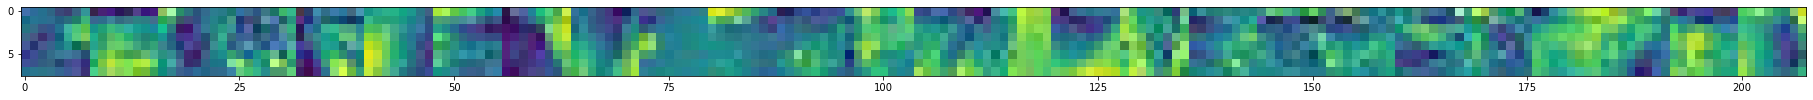

In [23]:
plot_images(images_lr_save8)

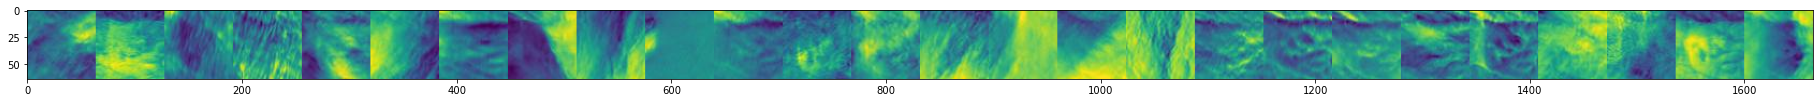

In [24]:
plot_images(images_gen_save8)

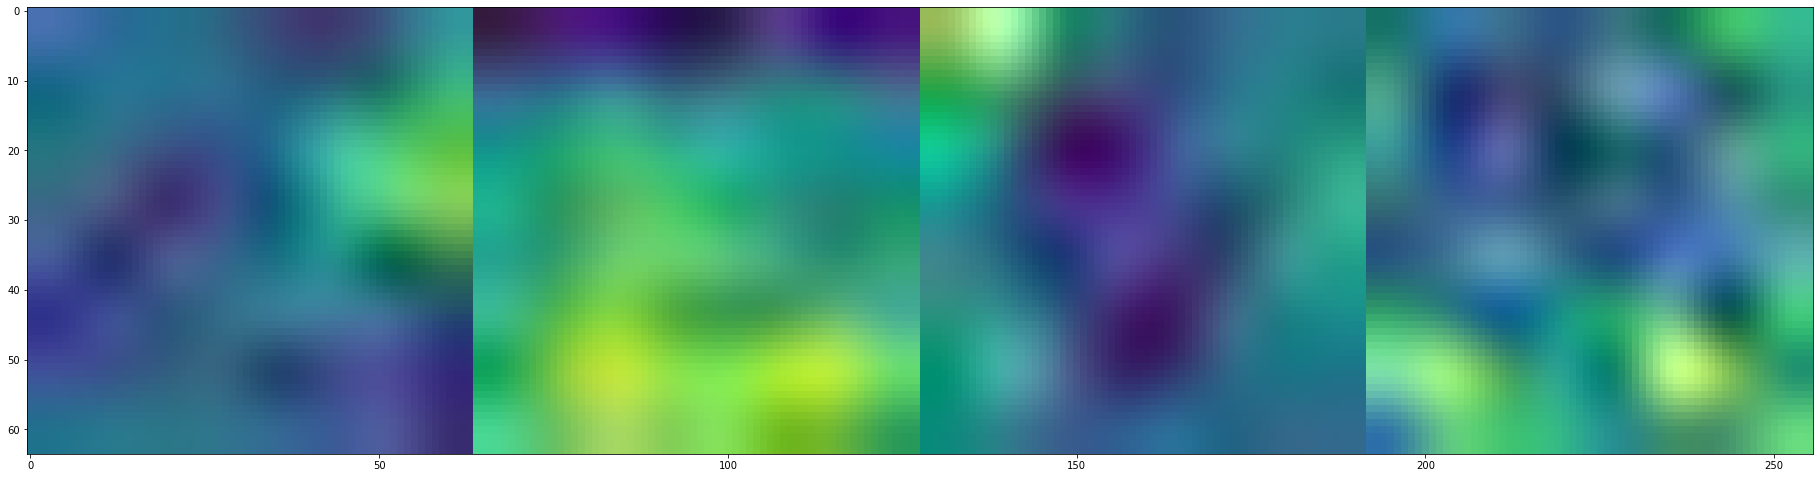

In [31]:
plot_images(images_bicubic_save8[0:4])

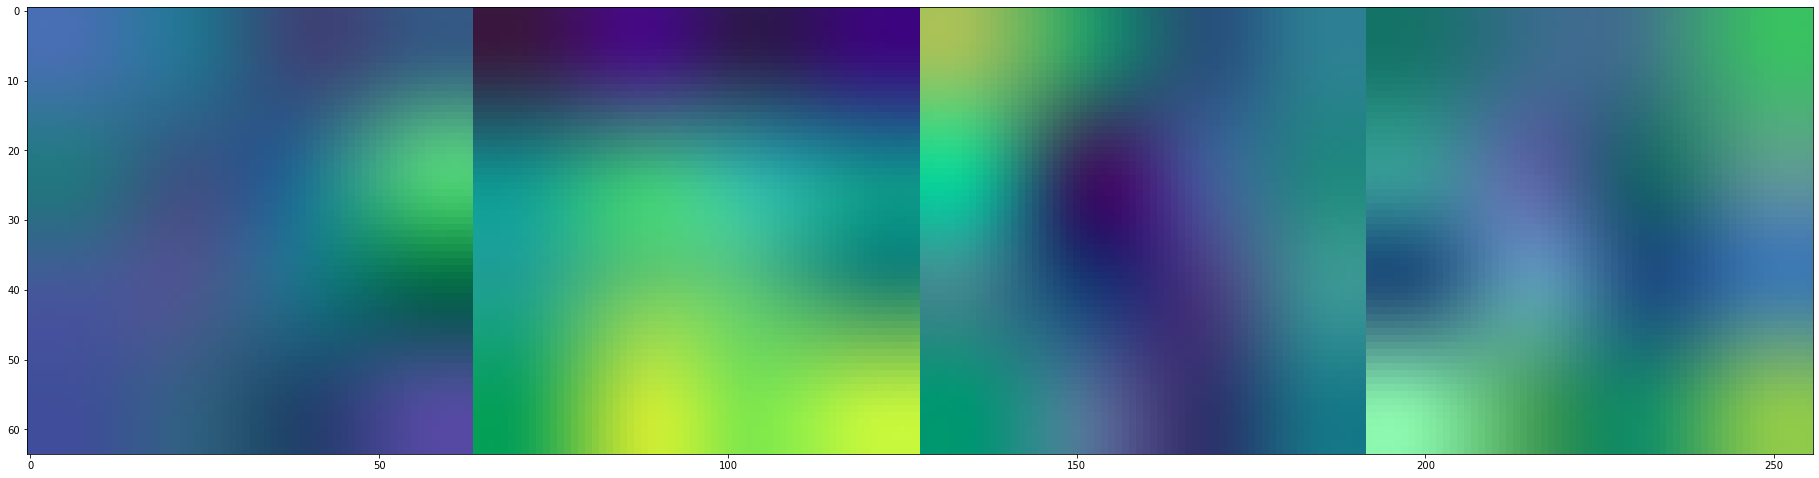

In [32]:
plot_images(images_bicubic_save16[0:4])

In [ ]:
import matplotlib 
matplotlib.rcParams.update({'font.size': 13})

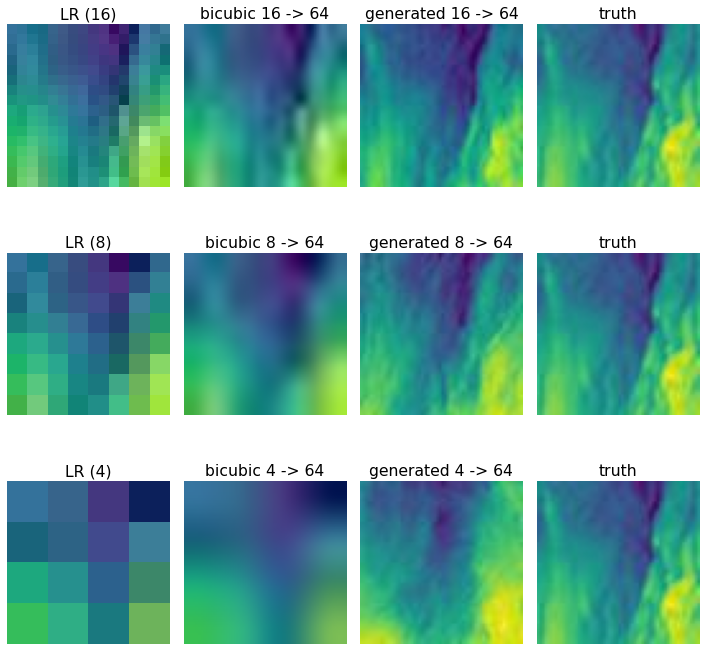

In [90]:
i = 8
image_data = [images_lr_save[i], images_lr_save8[i], images_lr_save16[i],
            images_bicubic_save[i], images_bicubic_save8[i], images_bicubic_save16[i],
             images_gen_save[i], images_gen_save8[i], images_gen_save16[i],
             images_hr_save[i], images_hr_save[i], images_hr_save[i]]

plt.figure(figsize=(10,10)) # specifying the overall grid size
titles = ["LR (16)", "LR (8)", "LR (4)", "bicubic 16 -> 64", "bicubic 8 -> 64", "bicubic 4 -> 64", "generated 16 -> 64", "generated 8 -> 64", "generated 4 -> 64", "truth", "truth", "truth"]

indices = [1,5,9,2,6,10,3,7,11,4,8,12]
for i in range(12):
    plt.subplot(3,4,indices[i])    # the number of images in the grid is 5*5 (25)
    plt.imshow(image_data[i].permute(1,2,0))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.savefig("plots/resolution_comparison1.jpg")
plt.show()

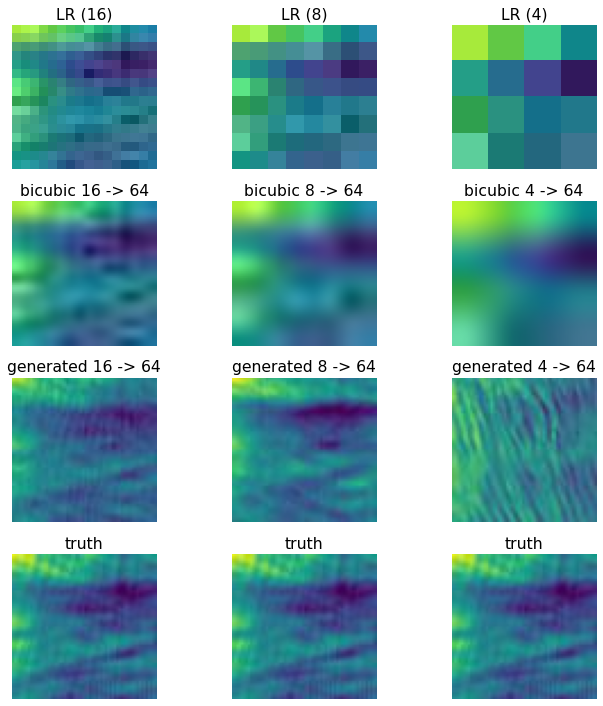

In [75]:
i = 6
image_data = [images_lr_save[i], images_lr_save8[i], images_lr_save16[i],
             images_bicubic_save[i], images_bicubic_save8[i], images_bicubic_save16[i],
             images_gen_save[i], images_gen_save8[i], images_gen_save16[i],
             images_hr_save[i], images_hr_save[i], images_hr_save[i]]

plt.figure(figsize=(10,10)) # specifying the overall grid size

titles = ["LR (16)", "LR (8)", "LR (4)", "bicubic 16 -> 64", "bicubic 8 -> 64", "bicubic 4 -> 64", "generated 16 -> 64", "generated 8 -> 64", "generated 4 -> 64", "truth", "truth", "truth"]
for i in range(12):
    plt.subplot(4,3,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image_data[i].permute(1,2,0))
    plt.axis('off')
    plt.title(titles[i])

plt.tight_layout()
plt.savefig("plots/resolution_comparison2.jpg")
plt.show()

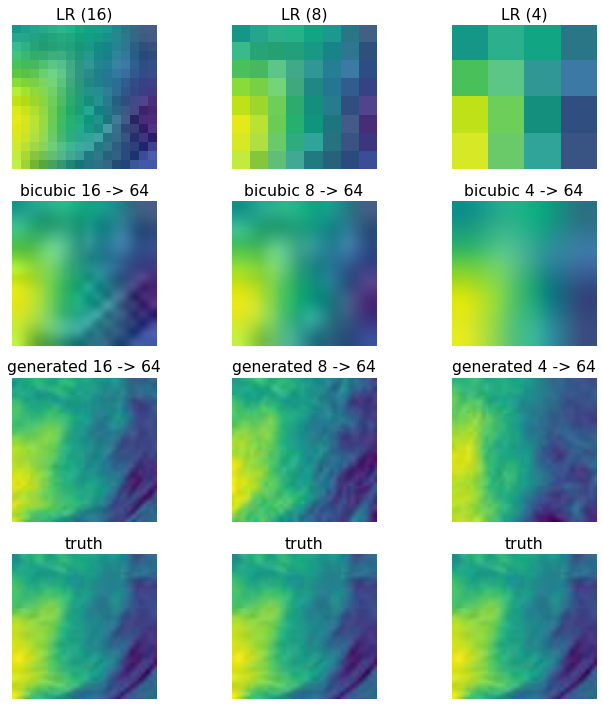

In [68]:

i = 5
image_data = [images_lr_save[i], images_lr_save8[i], images_lr_save16[i],
             images_bicubic_save[i], images_bicubic_save8[i], images_bicubic_save16[i],
             images_gen_save[i], images_gen_save8[i], images_gen_save16[i],
             images_hr_save[i], images_hr_save[i], images_hr_save[i]]

plt.figure(figsize=(10,10)) # specifying the overall grid size

titles = ["LR (16)", "LR (8)", "LR (4)", "bicubic 16 -> 64", "bicubic 8 -> 64", "bicubic 4 -> 64", "generated 16 -> 64", "generated 8 -> 64", "generated 4 -> 64", "truth", "truth", "truth"]
for i in range(12):
    plt.subplot(4,3,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image_data[i].permute(1,2,0))
    plt.axis('off')
    plt.title(titles[i], fontsize = "large")

plt.tight_layout()
plt.show()

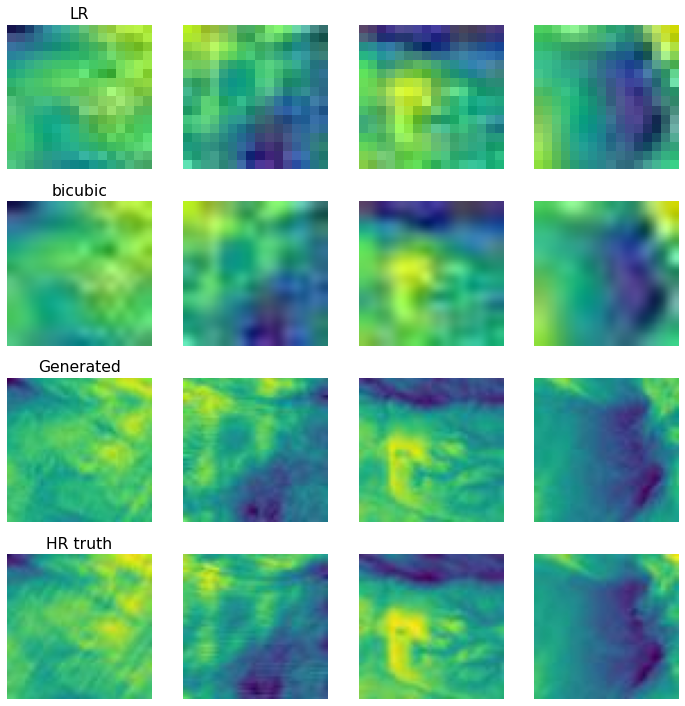

In [97]:
i = 22
image_data = [images_lr_save[i], images_lr_save[i+1], images_lr_save[i+2], images_lr_save[i+3],
            images_bicubic_save[i], images_bicubic_save[i+1], images_bicubic_save[i+2], images_bicubic_save[i+3],
             images_gen_save[i], images_gen_save[i+1], images_gen_save[i+2], images_gen_save[i+3],
             images_hr_save[i], images_hr_save[i+1], images_hr_save[i+2], images_hr_save[i+3]]

plt.figure(figsize=(10,10)) # specifying the overall grid size
titles = ["LR (16)", "LR (8)", "LR (4)", "bicubic 16 -> 64", "bicubic 8 -> 64", "bicubic 4 -> 64", "generated 16 -> 64", "generated 8 -> 64", "generated 4 -> 64", "truth", "truth", "truth"]

indices = [1,5,9,2,6,10,3,7,11,4,8,12]
for i in range(16):
    plt.subplot(4,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image_data[i].permute(1,2,0))
    if i == 0:
        plt.title("LR")
    if i == 4:
        plt.title("bicubic")
    if i == 8:
        plt.title("Generated")
    if i == 12:
        plt.title("HR truth")
    plt.axis('off')

plt.tight_layout()
plt.savefig("plots/examples4.jpg")
plt.show()

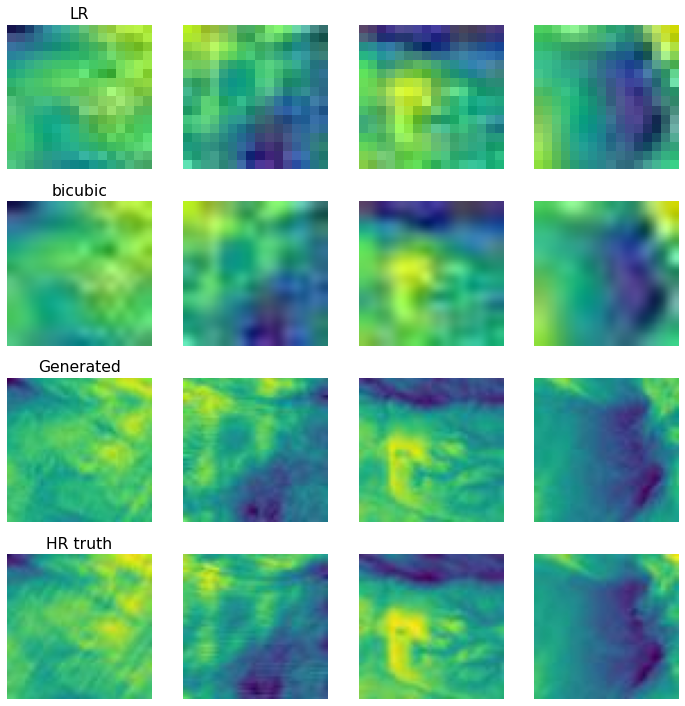

In [97]:
i = 20
image_data = [images_lr_save[i], images_lr_save[i+1], images_lr_save[i+2], images_lr_save[i+3],
            images_bicubic_save[i], images_bicubic_save[i+1], images_bicubic_save[i+2], images_bicubic_save[i+3],
             images_gen_save[i], images_gen_save[i+1], images_gen_save[i+2], images_gen_save[i+3],
             images_hr_save[i], images_hr_save[i+1], images_hr_save[i+2], images_hr_save[i+3]]

plt.figure(figsize=(10,10)) # specifying the overall grid size
titles = ["LR (16)", "LR (8)", "LR (4)", "bicubic 16 -> 64", "bicubic 8 -> 64", "bicubic 4 -> 64", "generated 16 -> 64", "generated 8 -> 64", "generated 4 -> 64", "truth", "truth", "truth"]

indices = [1,5,9,2,6,10,3,7,11,4,8,12]
for i in range(16):
    plt.subplot(4,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image_data[i].permute(1,2,0))
    if i == 0:
        plt.title("LR")
    if i == 4:
        plt.title("bicubic")
    if i == 8:
        plt.title("Generated")
    if i == 12:
        plt.title("HR truth")
    plt.axis('off')

plt.tight_layout()
plt.savefig("plots/examples4.jpg")
plt.show()